<a href="https://colab.research.google.com/github/Trishti-s/Assignment-Sampling/blob/main/Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install imbalanced-learn

In [11]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [12]:
train=pd.read_csv('/content/Creditcard_data.csv')
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
X=train.drop(columns=["Class"])
y=train["Class"]


In [14]:
y.value_counts()

,count
Class,
0,763
1,9


In [15]:
scaler=StandardScaler()
X[["Time","Amount"]]=scaler.fit_transform(X[["Time","Amount"]])


In [16]:
models = {
    "Logistic Regression":LogisticRegression(max_iter=1000),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(n_estimators=100),
    "KNN":KNeighborsClassifier(n_neighbors=5),
    "SVM":SVC()
}


In [17]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

def train_evaluate(X_train, X_test, y_train, y_test):
    results={}

    for name, model in models.items():
        if y_train.nunique() < 2:
            results[name] = {
                "Status": "Failed (Single Class)",
                "Accuracy": None,
                "F1": None,
                "Recall": None
            }
            continue

        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        results[name] = {
            "Status": "Success",
            "Accuracy": accuracy_score(y_test, preds),
            "F1": f1_score(y_test, preds, zero_division=0),
            "Recall": recall_score(y_test, preds, zero_division=0)
        }

    return results



Random Sampling

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
random_results=train_evaluate(X_train, X_test, y_train, y_test)
random_results


{'Logistic Regression': {'Status': 'Success',
  'Accuracy': 0.9870967741935484,
  'F1': 0.0,
  'Recall': 0.0},
 'Decision Tree': {'Status': 'Success',
  'Accuracy': 0.967741935483871,
  'F1': 0.0,
  'Recall': 0.0},
 'Random Forest': {'Status': 'Success',
  'Accuracy': 0.9870967741935484,
  'F1': 0.0,
  'Recall': 0.0},
 'KNN': {'Status': 'Success',
  'Accuracy': 0.9870967741935484,
  'F1': 0.0,
  'Recall': 0.0},
 'SVM': {'Status': 'Success',
  'Accuracy': 0.9870967741935484,
  'F1': 0.0,
  'Recall': 0.0}}

Systematic Sampling

In [19]:
k = 10
idx = list(range(0, len(X), k))

X_sys = X.iloc[idx]
y_sys = y.iloc[idx]

X_train, X_test, y_train, y_test = train_test_split(
    X_sys, y_sys, test_size=0.2, random_state=42
)

systematic_results = train_evaluate(X_train, X_test, y_train, y_test)

systematic_results

{'Logistic Regression': {'Status': 'Failed (Single Class)',
  'Accuracy': None,
  'F1': None,
  'Recall': None},
 'Decision Tree': {'Status': 'Failed (Single Class)',
  'Accuracy': None,
  'F1': None,
  'Recall': None},
 'Random Forest': {'Status': 'Failed (Single Class)',
  'Accuracy': None,
  'F1': None,
  'Recall': None},
 'KNN': {'Status': 'Failed (Single Class)',
  'Accuracy': None,
  'F1': None,
  'Recall': None},
 'SVM': {'Status': 'Failed (Single Class)',
  'Accuracy': None,
  'F1': None,
  'Recall': None}}

Bootstraping

In [20]:
boot_idx = np.random.choice(len(X_train), size=len(X_train), replace=True)
X_boot = X_train.iloc[boot_idx]
y_boot = y_train.iloc[boot_idx]
X_train, X_test, y_train, y_test = train_test_split(
    X_boot, y_boot, test_size=0.2, random_state=42
)

bootstrap_results = train_evaluate(X_train, X_test, y_train, y_test)
bootstrap_results


{'Logistic Regression': {'Status': 'Failed (Single Class)',
  'Accuracy': None,
  'F1': None,
  'Recall': None},
 'Decision Tree': {'Status': 'Failed (Single Class)',
  'Accuracy': None,
  'F1': None,
  'Recall': None},
 'Random Forest': {'Status': 'Failed (Single Class)',
  'Accuracy': None,
  'F1': None,
  'Recall': None},
 'KNN': {'Status': 'Failed (Single Class)',
  'Accuracy': None,
  'F1': None,
  'Recall': None},
 'SVM': {'Status': 'Failed (Single Class)',
  'Accuracy': None,
  'F1': None,
  'Recall': None}}

Stratified Sampling

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

stratified_results=train_evaluate(X_train, X_test, y_train, y_test)
stratified_results

{'Logistic Regression': {'Status': 'Success',
  'Accuracy': 0.9870967741935484,
  'F1': 0.0,
  'Recall': 0.0},
 'Decision Tree': {'Status': 'Success',
  'Accuracy': 0.9741935483870968,
  'F1': 0.0,
  'Recall': 0.0},
 'Random Forest': {'Status': 'Success',
  'Accuracy': 0.9870967741935484,
  'F1': 0.0,
  'Recall': 0.0},
 'KNN': {'Status': 'Success',
  'Accuracy': 0.9870967741935484,
  'F1': 0.0,
  'Recall': 0.0},
 'SVM': {'Status': 'Success',
  'Accuracy': 0.9870967741935484,
  'F1': 0.0,
  'Recall': 0.0}}

In [22]:
cv_results = {}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy")
    cv_results[name] = scores.mean()
cv_results

{'Logistic Regression': np.float64(0.9870465018852116),
 'Decision Tree': np.float64(0.9779807289484708),
 'Random Forest': np.float64(0.9883452031839128),
 'KNN': np.float64(0.9883452031839128),
 'SVM': np.float64(0.9883452031839128)}

In [23]:
final_results = pd.DataFrame({
    "Random":random_results,
    "Systematic":systematic_results,
    "Stratified":stratified_results,
    "Bootstrapping":bootstrap_results,
    "Cross Validation":cv_results
})

final_results


,Random,Systematic,Stratified,Bootstrapping,Cross Validation
Logistic Regression,"{'Status': 'Success', 'Accuracy': 0.9870967741...","{'Status': 'Failed (Single Class)', 'Accuracy'...","{'Status': 'Success', 'Accuracy': 0.9870967741...","{'Status': 'Failed (Single Class)', 'Accuracy'...",0.987047
Decision Tree,"{'Status': 'Success', 'Accuracy': 0.9677419354...","{'Status': 'Failed (Single Class)', 'Accuracy'...","{'Status': 'Success', 'Accuracy': 0.9741935483...","{'Status': 'Failed (Single Class)', 'Accuracy'...",0.977981
Random Forest,"{'Status': 'Success', 'Accuracy': 0.9870967741...","{'Status': 'Failed (Single Class)', 'Accuracy'...","{'Status': 'Success', 'Accuracy': 0.9870967741...","{'Status': 'Failed (Single Class)', 'Accuracy'...",0.988345
KNN,"{'Status': 'Success', 'Accuracy': 0.9870967741...","{'Status': 'Failed (Single Class)', 'Accuracy'...","{'Status': 'Success', 'Accuracy': 0.9870967741...","{'Status': 'Failed (Single Class)', 'Accuracy'...",0.988345
SVM,"{'Status': 'Success', 'Accuracy': 0.9870967741...","{'Status': 'Failed (Single Class)', 'Accuracy'...","{'Status': 'Success', 'Accuracy': 0.9870967741...","{'Status': 'Failed (Single Class)', 'Accuracy'...",0.988345


In [24]:
import pandas as pd
clean_results=pd.DataFrame(index=final_results.index)

for col in final_results.columns:
    acc_list=[]
    for val in final_results[col]:
        # Case 1: dict with success
        if isinstance(val, dict) and val.get("Status") == "Success":
            acc_list.append(val["Accuracy"])
        # Case 2: cross-validation float
        elif isinstance(val,float):
            acc_list.append(val)
        # Case 3: failed sampling
        else:
            acc_list.append(np.nan)
    clean_results[col]=acc_list

clean_results


,Random,Systematic,Stratified,Bootstrapping,Cross Validation
Logistic Regression,0.987097,NaN,0.987097,NaN,0.987047
Decision Tree,0.967742,NaN,0.974194,NaN,0.977981
Random Forest,0.987097,NaN,0.987097,NaN,0.988345
KNN,0.987097,NaN,0.987097,NaN,0.988345
SVM,0.987097,NaN,0.987097,NaN,0.988345


In [25]:
best_sampling_per_model=clean_results.idxmax(axis=1)
best_accuracy_per_model=clean_results.max(axis=1)

summary = pd.DataFrame({
    "Best Sampling Technique":best_sampling_per_model,
    "Best Accuracy":best_accuracy_per_model
})

summary


,Best Sampling Technique,Best Accuracy
Logistic Regression,Random,0.987097
Decision Tree,Cross Validation,0.977981
Random Forest,Cross Validation,0.988345
KNN,Cross Validation,0.988345
SVM,Cross Validation,0.988345


In [26]:
best_model=best_accuracy_per_model.idxmax()
best_sampling=best_sampling_per_model[best_model]
best_score=best_accuracy_per_model[best_model]

print("Best Overall Result")
print("-------------------")
print(f"Model: {best_model}")
print(f"Sampling Technique: {best_sampling}")
print(f"Accuracy: {best_score:.4f}")


Best Overall Result
-------------------
Model: Random Forest
Sampling Technique: Cross Validation
Accuracy: 0.9883


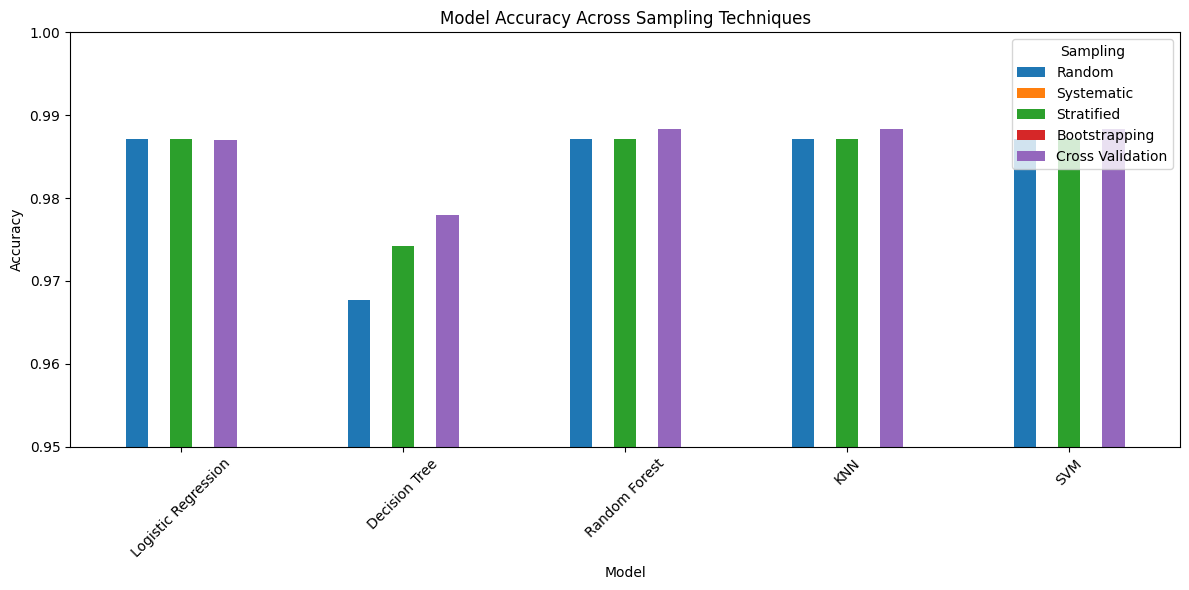

In [28]:
import matplotlib.pyplot as plt

clean_results.plot(
    kind="bar",
    figsize=(12, 6),
    ylim=(0.95, 1.0)
)

plt.title("Model Accuracy Across Sampling Techniques")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(title="Sampling")
plt.tight_layout()
plt.show()
